In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = 'Data/output_data_with_time.csv'
df = pd.read_csv(file_path)

In [4]:
time = df['Time (seconds)']
fhr = df['FHR']
uc = df['UC']

In [10]:
def plot_ctg(_fhr, _uc, _time):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    ax1.plot(_time, _fhr, color='blue', label='FHR (BPM)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('FHR (BPM)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(50, 210)  # Typical FHR range
    
    # Add gridlines for FHR
    ax1.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Create a second y-axis for UC
    ax2 = ax1.twinx()
    ax2.plot(_time, _uc, color='orange', label='UC (mmHg)')
    ax2.set_ylabel('UC (mmHg)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.set_ylim(0, 200)  # Typical UC range
    
    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    
    # Title and layout adjustments
    plt.title('CTG Data')
    fig.tight_layout()
    
    # Show the plot
    plt.show()

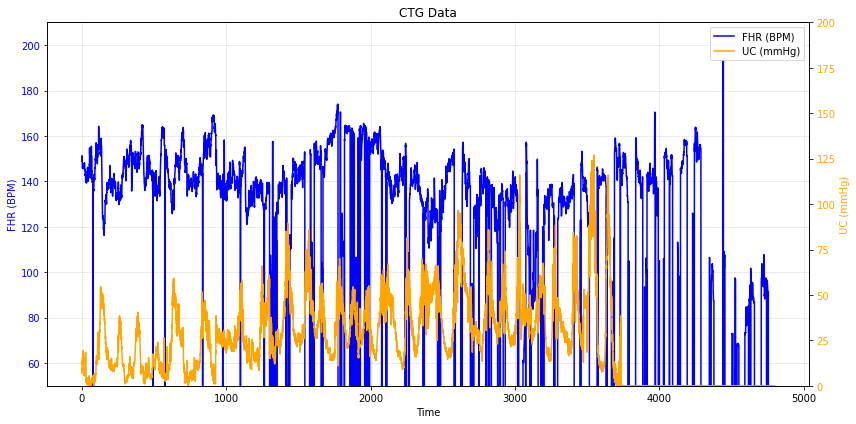

In [11]:
plot_ctg(fhr, uc, time)

In [12]:
# Divide the whole df into 10-second intervals
def divide_df(_df, _interval):
    _intervals = []
    for i in range(0, len(_df), _interval):
        _intervals.append(_df[i:i+_interval])
    return _intervals

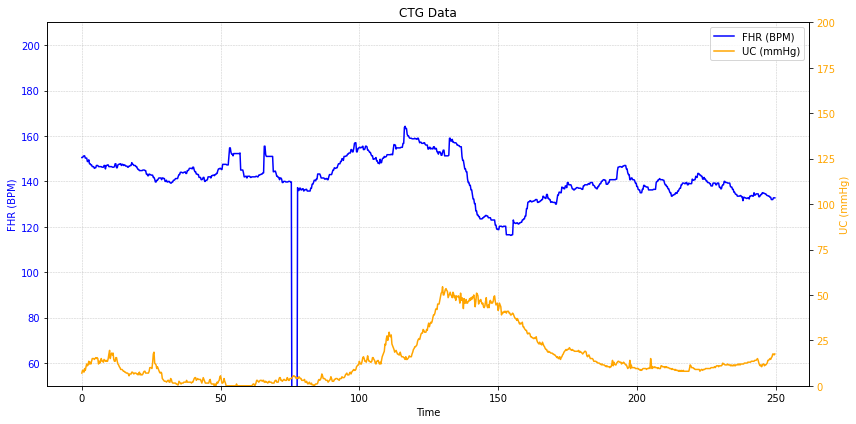

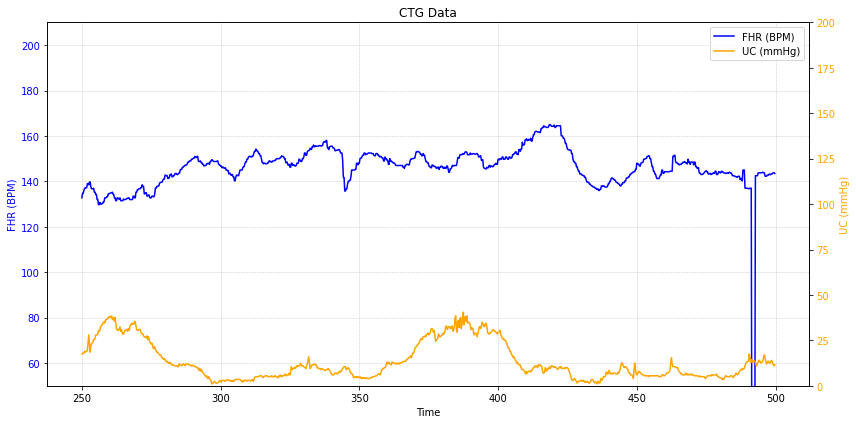

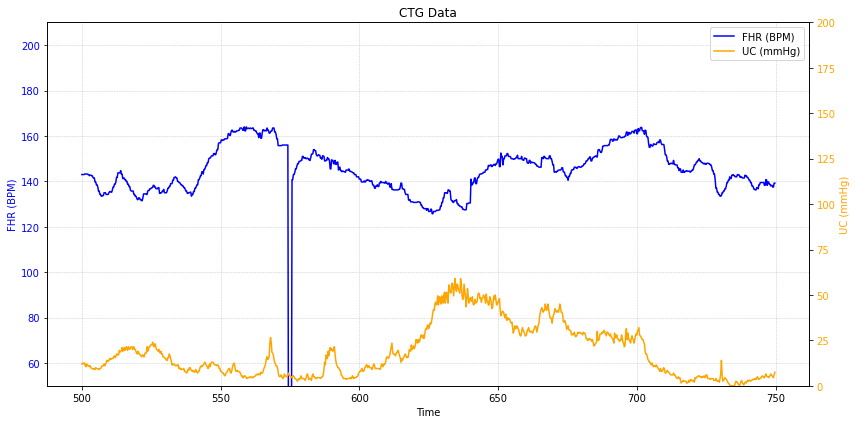

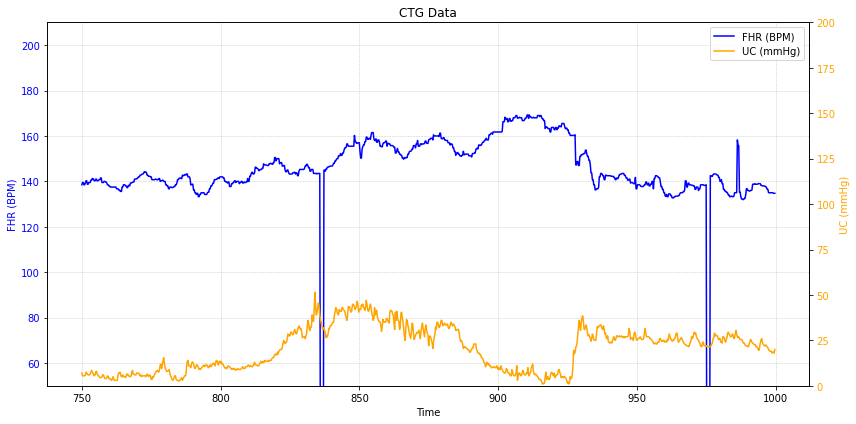

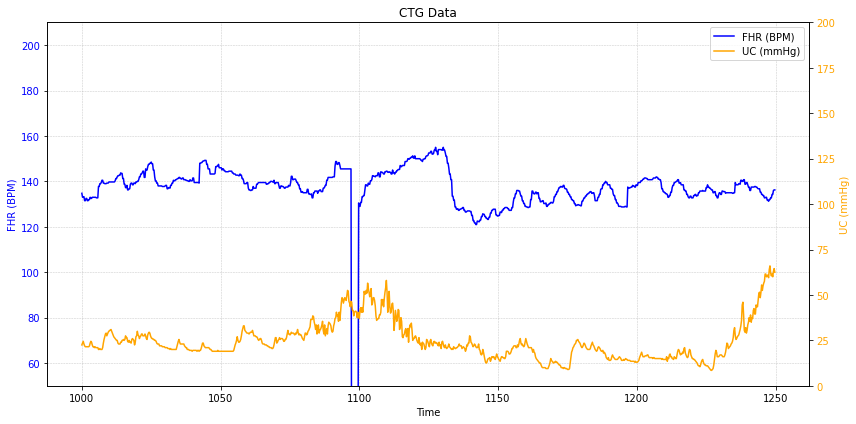

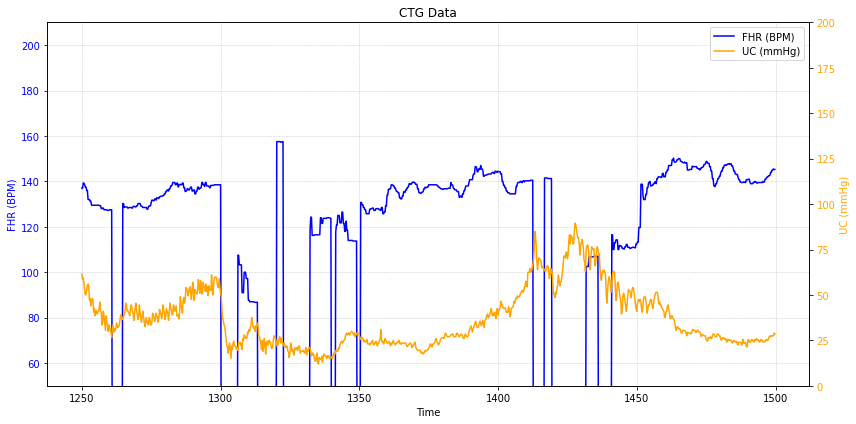

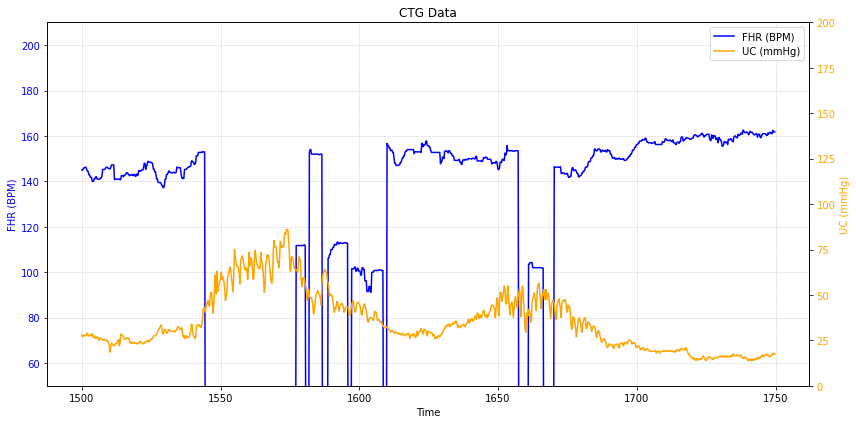

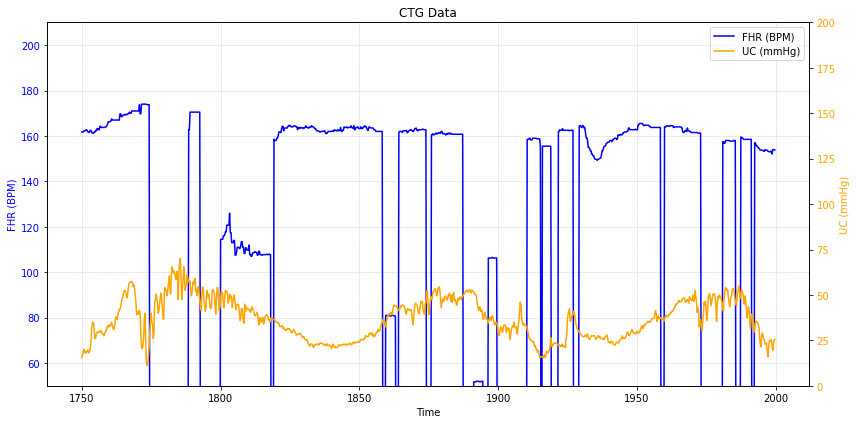

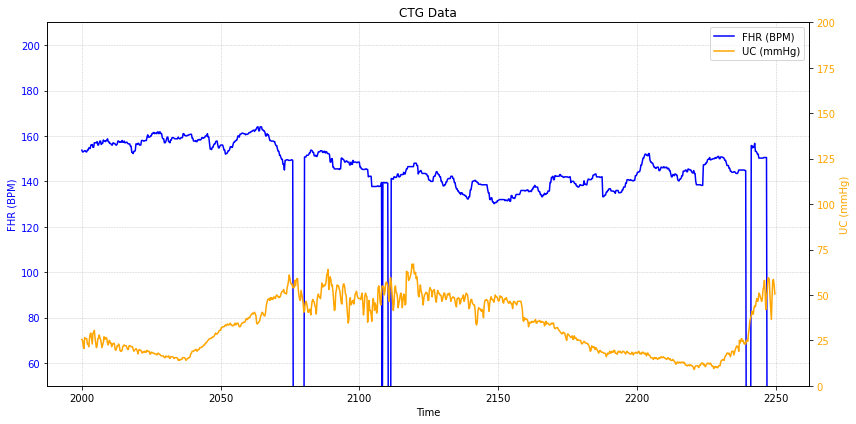

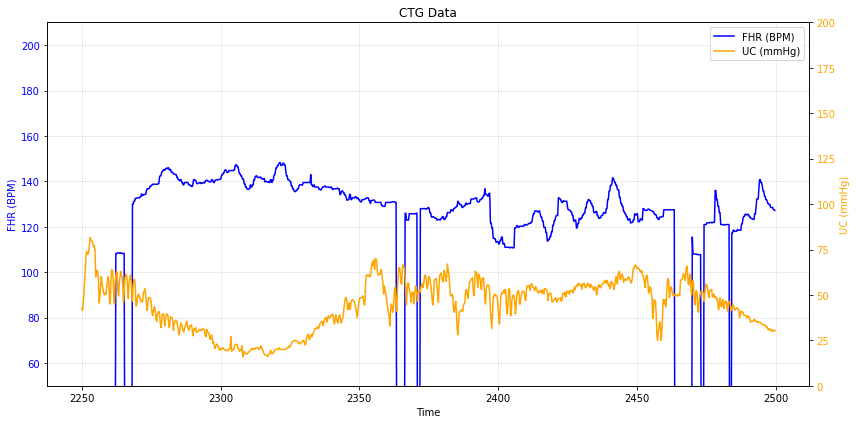

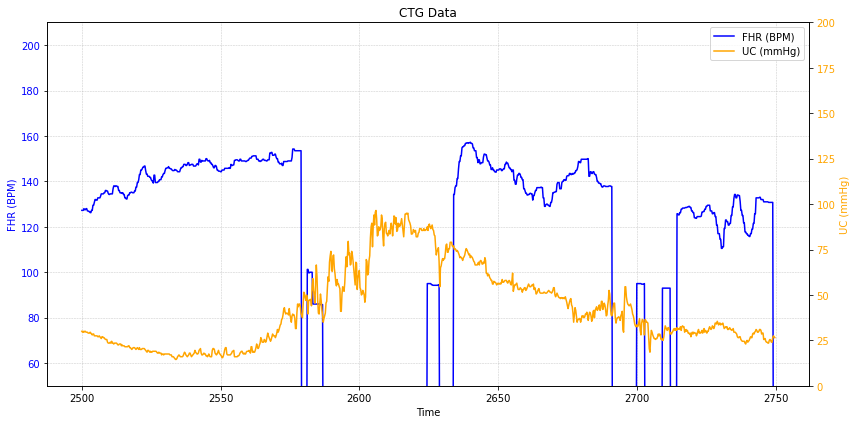

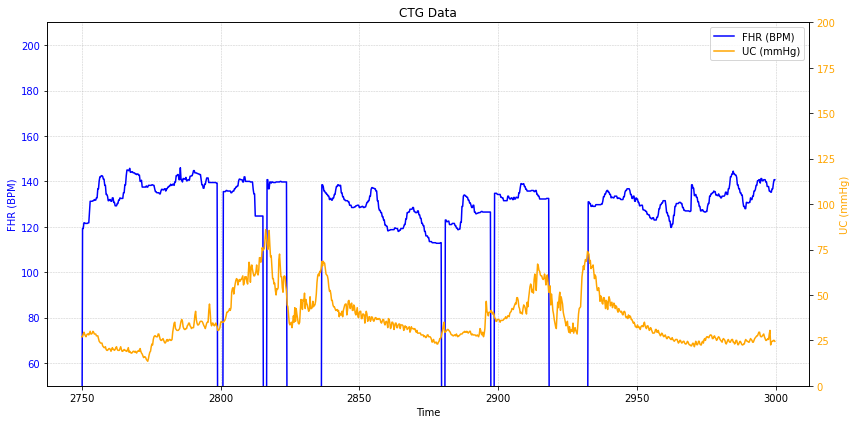

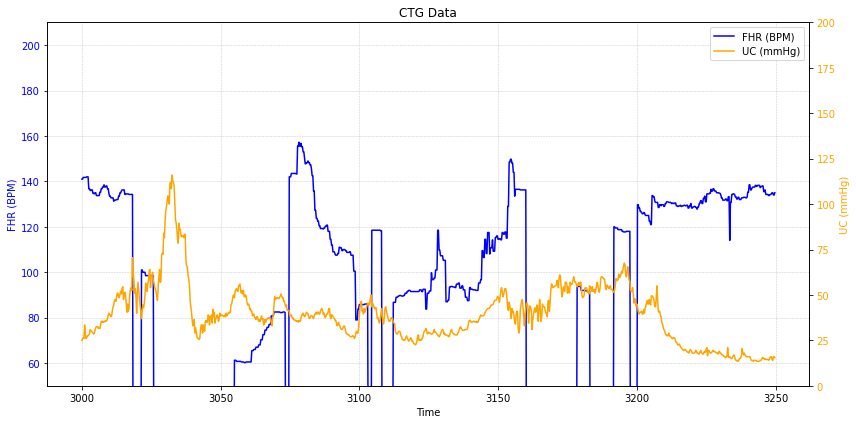

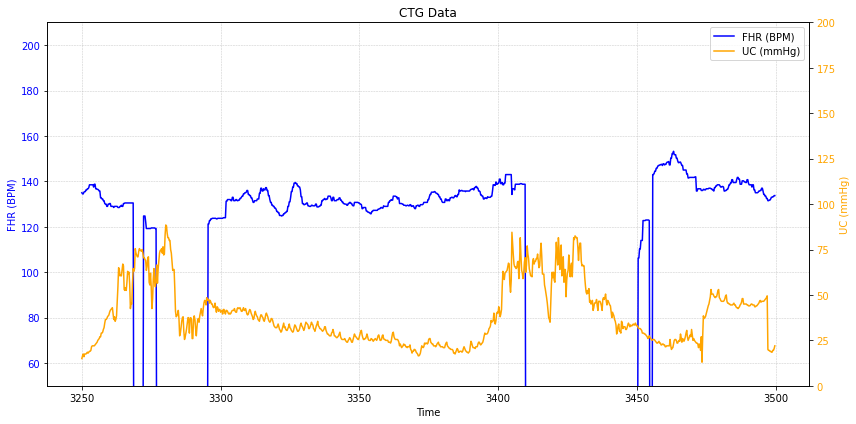

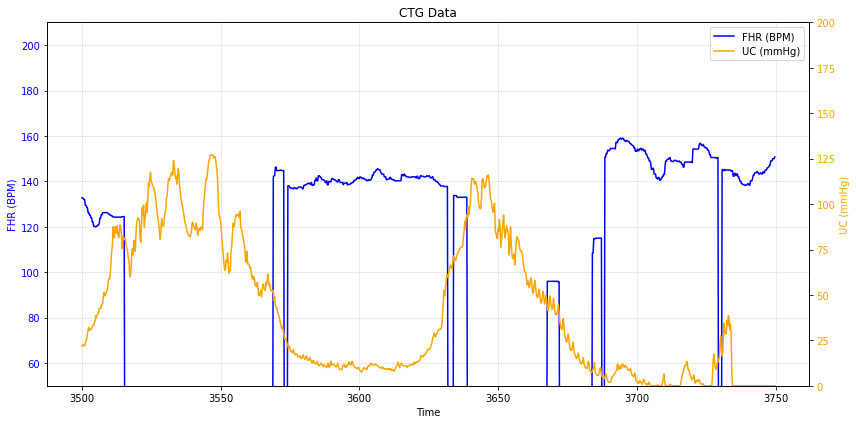

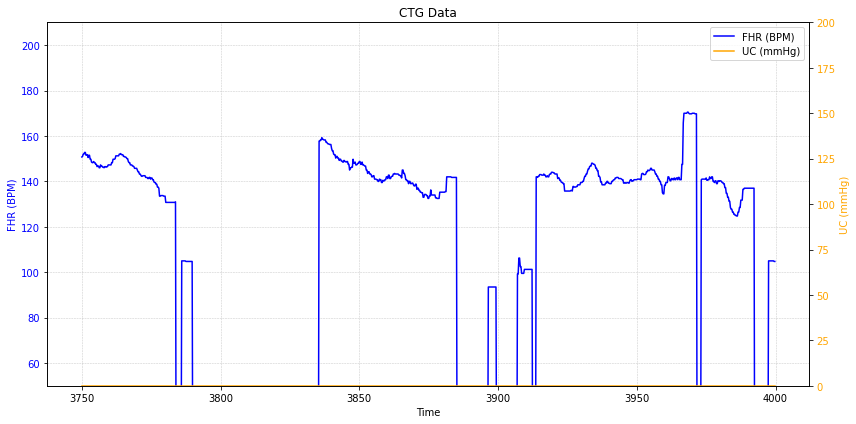

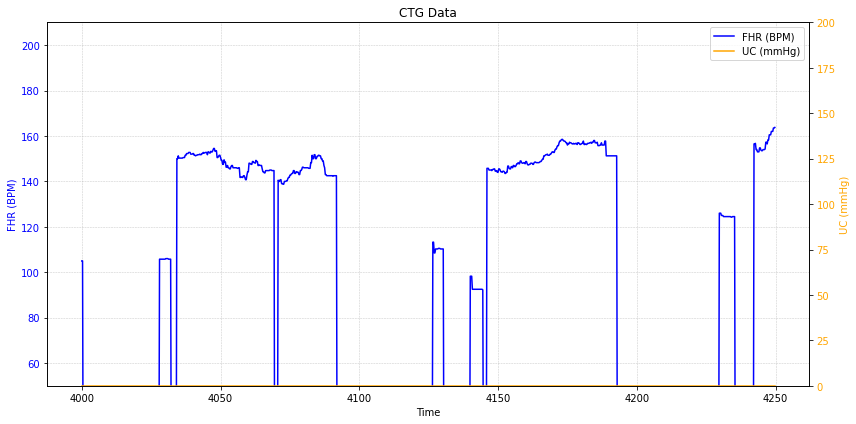

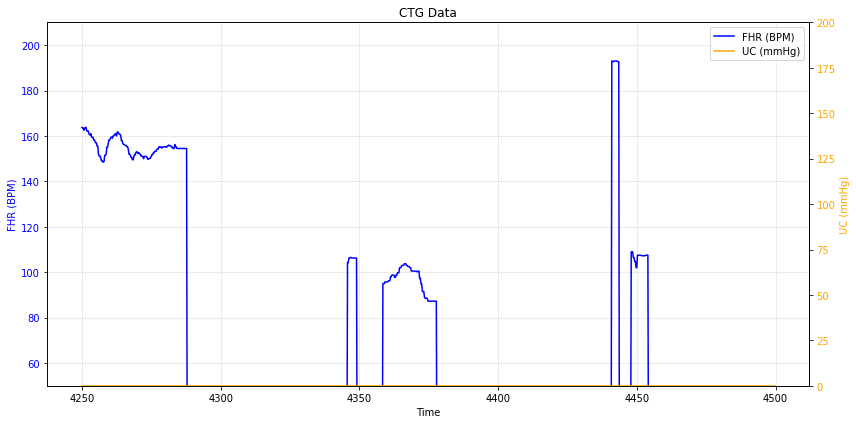

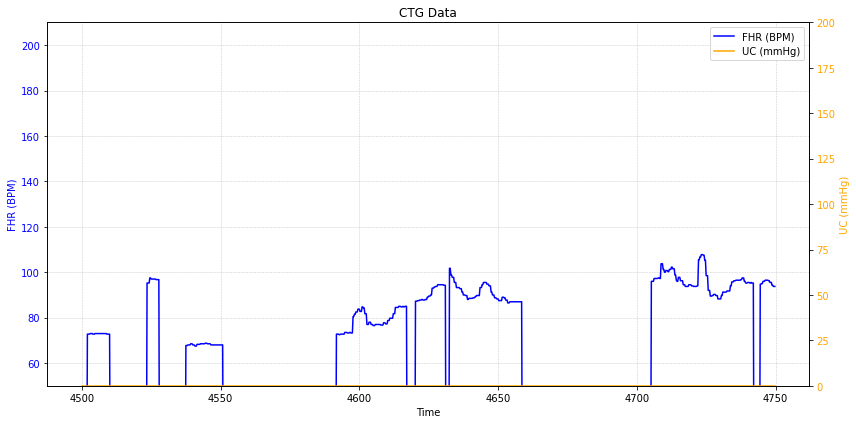

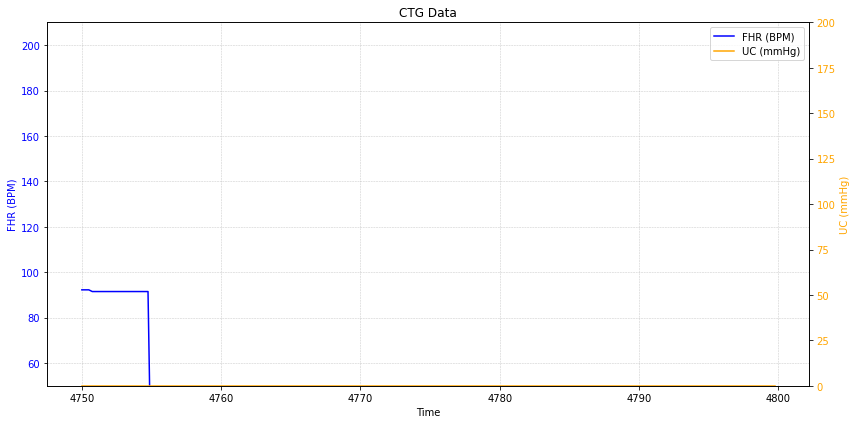

In [13]:
intervals = divide_df(df, 1000)
for interval in intervals:
    plot_ctg(interval['FHR'], interval['UC'], interval['Time (seconds)'])